0
('RKvKbCp3SvZKGxS6wEBpGIcoSOXxHUKS', 'Sim_Test', 0.5607119798660278, 1)
1
('RKvKbCp3SvZKGxS6wEBpGIcoSOXxHUKS', 'Stroop', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
2
('RKvKbCp3SvZKGxS6wEBpGIcoSOXxHUKS', 'Txt_to_Img', 0.8647276163101196, 1)
3
('RKvKbCp3SvZKGxS6wEBpGIcoSOXxHUKS', 'Wrong_Image', 1, 1, 1)
4
('RKvKbCp3SvZKGxS6wEBpGIcoSOXxHUKS', 'Memory_Test', 1, 0)
5
('RKvKbCp3SvZKGxS6wEBpGIcoSOXxHUKS', 'STT', '강아지가 방에 들어오면 고양이는 의자 밑에 숨는다', '강아지가 방에 들어오면 고양이는 의자 밑에 숨는다', 'O', 1)


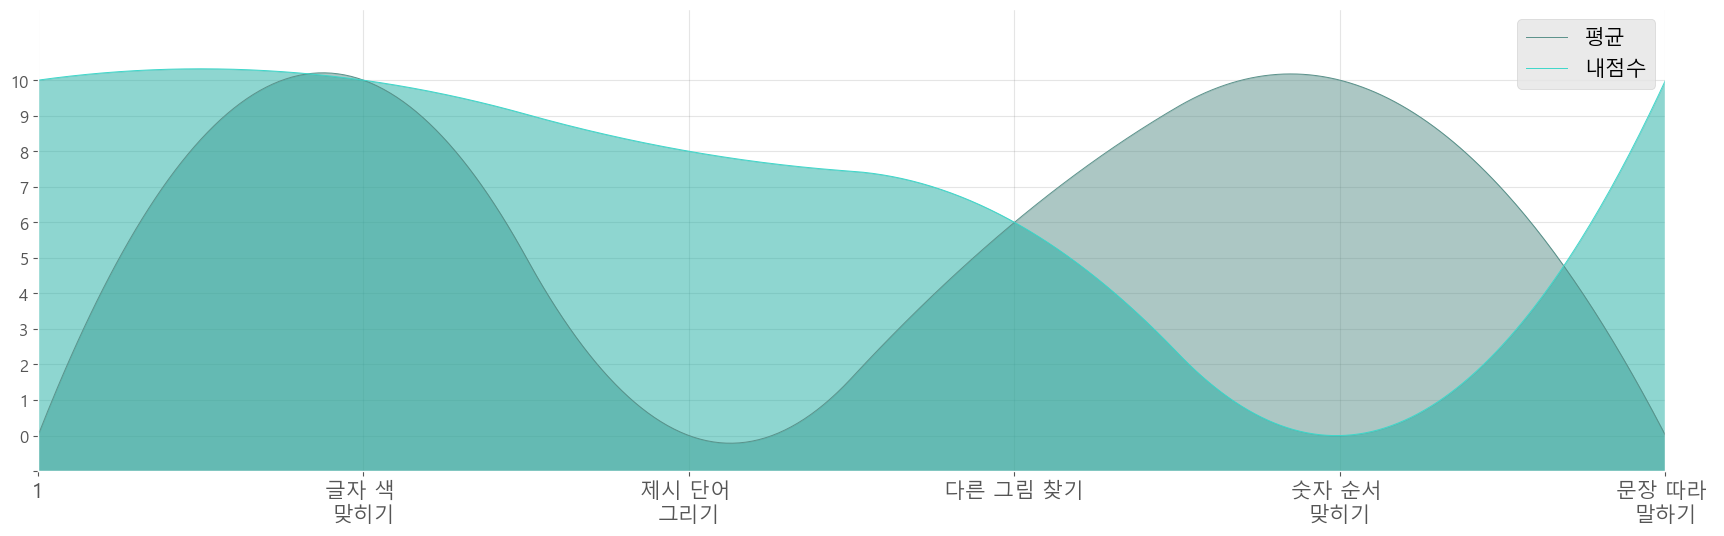

In [8]:
from flask import Blueprint, render_template, session
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 
import sqlite3


guest = 'RKvKbCp3SvZKGxS6wEBpGIcoSOXxHUKS'
conn = sqlite3.connect('ijm.db', isolation_level=None)
    # 커서
c = conn.cursor()
a = ['Sim_Test','Stroop','Txt_to_Img', 'Wrong_Image', 'Memory_Test','STT']
sql = []
for i in range(len(a)):
    print(i)
    c.execute("SELECT * FROM "+ a[i] + " WHERE session = '{}'".format(guest))
    db =c.fetchone()
    sql.append(db)
    print(db)
# 1. 맞으면 10점 틀리면 0점
# 2. 개당 1점 
# 3. 0.1 -> 1점...?? 이건 이야기 해봐야 할듯
#4. 1개당 3점 , 다 맟히면 10점
#5. 점수 갖고오기
#6. 맞으면 10점 틀리면 0점
#np.array['sim_point','stroop_point','write_point','wrong_point','remember_point','stt_point']

#1 sim_point
if sql[0][3] == 0:
    sim_point = 0
else : sim_point = 10


# 2 stroop_point
##방법1. for 사용해서 점수 더하기
stroop_point = 0
index = range(2,12) # 아직 문제를 8개 할지 10개 할지 안 정해서 인덱스로 갖고옴. 나중에 10로 확정되면  for i in range(2,12) 로 바꾸면 될듯
for i in index:
    if sql[1][i]== 1 :
        stroop_point += 1
    elif sql[1][i]== 0:
        stroop_point +=0

## 방법2. 모든 컬럼을 하나의 list 에 담기 - stroop_point = len(list()) 
# index = range(2,10)
# stroop_list =[]
# for i in index :
#     stroop_list.append(sql[1][i])
# stroop_point = stroop_list.count('정답')

# if stroop_point == 8: # 2점 더 주기(문제가 8개라서.. 만약 10개로 늘어나면 삭제하기)
#     stroop_point = 10

#3 write_point
write_point =str(sql[2][2])[2]# 점수를 str 으로 바꿔서 슬라이싱 해서 갖고 오기
write_point = int(write_point)
if write_point == '0':
    if str(sql[2][2])[0] == '0':
        write_point = 0
    elif str(sql[2][2])[0] == '1':
        write_point = 10

# 4 wrong_point
# 방법 1 for 사용해서 점수 더하기
wrong_point = 0
if sql[3][1]== 1: wrong_point +=3
else : wrong_point +=0
if sql[3][2]== 1: wrong_point +=3
else : wrong_point +=0
if sql[3][3]== 1: wrong_point +=3
else : wrong_point +=0
#이렇게 3개를 하게되면 마지막 1점을 어떻게 더 해줄지 고민해야함 if wrong_point == 9 : worng_point = 10 같을걸 생각해보기
if wrong_point == 9:
    wrong_point = 10    

# 방법 2 정답을 하나의 리스트에 담아서 정답의 갯수로 점수주기
# index = range(1,4)
# wrong_list =[]
# for i in index :
#     wrong_list.append(sql[3][i])
    
# wrong_point = wrong_list.count('정답')
# if wrong_point == 9: # 2점 더 주기(문제가 8개라서.. 만약 10개로 늘어나면 삭제하기)
#     wrong_point = 10
    
#5 remember_point
remember_point = sql[4][3]


#6 stt_point
if sql[5][5]==1 : stt_point = 10 
else:stt_point = 0


# 대시보드 그래프
plt.style.use('ggplot')
x=np.array([1,2,3,4,5,6])
y=np.array([0, 10, 0, 6, 10, 0])
z=np.array([sim_point,stroop_point,write_point,wrong_point,remember_point,stt_point])

plt.rc('font', family='Malgun Gothic')
cubic_interploation_model1=interp1d(x,y,kind=2)
cubic_interploation_model2=interp1d(x,z,kind=2)
xs=np.linspace(1,6,500)
ys=cubic_interploation_model1(xs) + 1
zs=cubic_interploation_model2(xs) + 1
fig = plt.figure(figsize=(21, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, ys, color = '#5a918a', linewidth=0.7, label = '평균')
ax.plot(xs, zs, color = '#3dd7ca', linewidth=0.7, label = '내점수')
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(['1', '글자 색 \n맞히기', '제시 단어 \n그리기', '다른 그림 찾기', '숫자 순서 \n맞히기', '문장 따라 \n말하기'], 
                    fontsize=15, alpha = 1)
ax.set_yticklabels([None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], fontsize=12, alpha = 1)
ax.patch.set_facecolor('white')
ax.margins(x=0)
plt.grid(True, color='gray', alpha=0.2, linestyle='-')
plt.fill_between(xs, ys, color='#5a918a', alpha=0.5)
plt.fill_between(xs, zs, color='#1eafa3', alpha=0.5)
plt.ylim(0, 13)
plt.legend(fontsize=15)

plt.savefig(f'./mci/static/dashboard/{guest}.png')
plt.savefig('그래프',bbox_inches='tight' )

sim_point, stroop_point, write_point, wrong_point, remember_point, stt_point = z * 10
